<a href="https://colab.research.google.com/github/Tulyakai/BTC_oil_gold/blob/main/Btc_oil_gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd 
import matplotlib.pyplot as plt
import zipfile
import io
import requests
import seaborn as sns
import numpy as np

%matplotlib inline

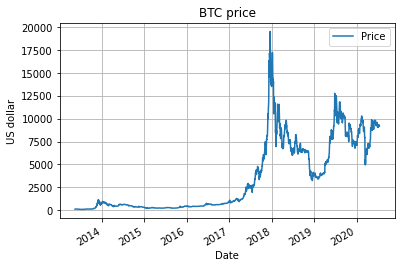

In [119]:
#Using since 2013-05-15 to 2020-07-15
f = zipfile.ZipFile('/content/drive/MyDrive/Datasets/crypto_datasets/crypto_dataset.zip')
btc_df = pd.read_csv(f.open('coin_Bitcoin.csv'), parse_dates=['Date'])
btc_df['Price'] = (btc_df['Low'] + btc_df['High'])/2 
btc_df = btc_df.drop(columns=['Symbol','Name', 'SNo', 'Open', 'Close', 'Volume', 'Marketcap', 'High' ,'Low'])
btc_df[np.logical_and(btc_df['Date'] >= '2013-05-15',  btc_df['Date'] <= '2020-07-15')].set_index('Date').plot()
plt.title('BTC price')
plt.ylabel('US dollar')
plt.grid()


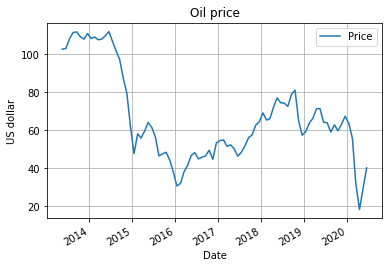

In [111]:
#Using since 2013-05-15 to 2020-07-15
r = requests.get('https://datahub.io/core/oil-prices/r/brent-monthly.csv')
oil_df = pd.read_csv(io.StringIO(r.text))
oil_df['Date'] = pd.to_datetime(oil_df['Date']+ ' 23:59:59')
oil_df[np.logical_and(oil_df['Date'] >= '2013-05-15', oil_df['Date'] <= '2020-07-15')].set_index('Date').plot()
plt.title('Oil price')
plt.ylabel('US dollar')
plt.grid()


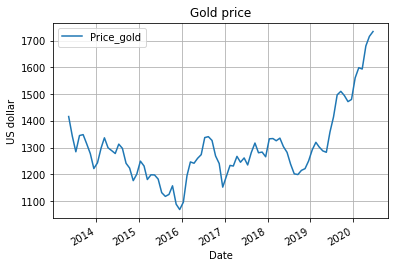

In [112]:
#Using since 2013-05-15 to 2020-07-15
r = requests.get('https://datahub.io/core/gold-prices/r/monthly.csv')
gold_df = pd.read_csv(io.StringIO(r.text))
gold_df['Date'] = pd.to_datetime(gold_df['Date']+ '-15 23:59:59')
gold_df.columns = ['Date', 'Price_gold']
gold_df[np.logical_and(gold_df['Date'] >= '2013-05-15', gold_df['Date'] <= '2020-07-15')].set_index('Date').plot()
plt.title('Gold price')
plt.ylabel('US dollar')
plt.grid()


In [113]:
btc_oil = pd.merge(btc_df, oil_df, on='Date', suffixes=('_btc','_oil'))
btc_oil_gold = btc_oil.merge(gold_df, on='Date')

btc_oil_gold['pct_btc'] = btc_oil_gold['Price_btc'].pct_change()*100
btc_oil_gold['pct_oil'] = btc_oil_gold['Price_oil'].pct_change()*100
btc_oil_gold['pct_gold'] = btc_oil_gold['Price_gold'].pct_change()*100

Text(0, 0.5, "Gold's scale price")

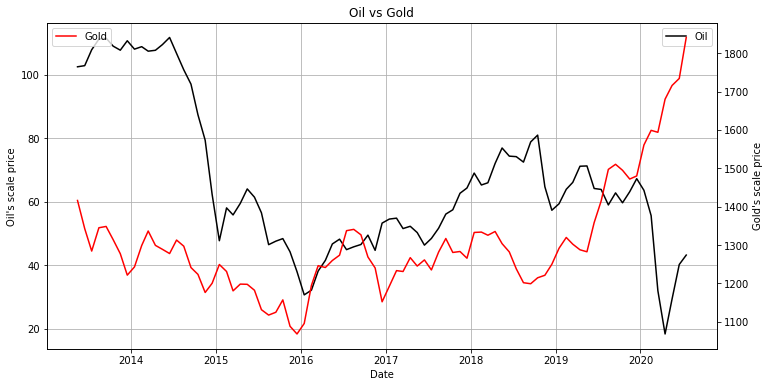

In [114]:
plt.figure(figsize=(12,6))
plt.title('Oil vs Gold')
plt.grid()
ax1 = sns.lineplot(x='Date', y='Price_oil', data=btc_oil_gold, color='black',label='Oil')
ax1.twinx()
ax1.set_ylabel('Oil\'s scale price')
ax2 = sns.lineplot(x='Date', y='Price_gold', data=btc_oil_gold, color='red',label='Gold') 
ax2.set_ylabel('Gold\'s scale price')


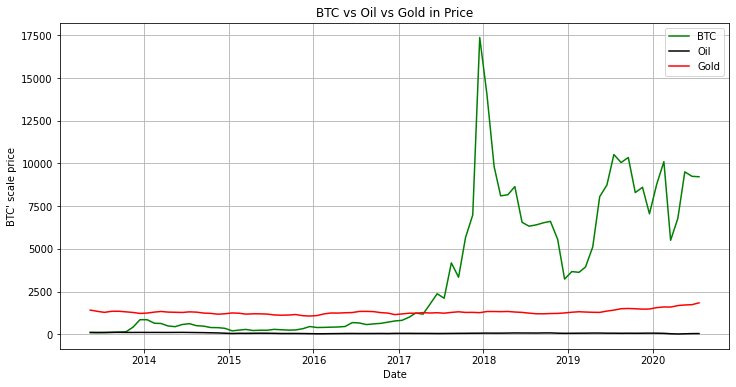

In [115]:
plt.figure(figsize=(12,6))
plt.title('BTC vs Oil vs Gold in Price')
plt.grid()
ax1 = sns.lineplot(x='Date', y='Price_btc', data=btc_oil_gold, color='green' ,label='BTC')
ax1.set_ylabel('BTC\' scale price')
ax2 = sns.lineplot(x='Date', y='Price_oil', data=btc_oil_gold, color='black',label='Oil')
ax3 = sns.lineplot(x='Date', y='Price_gold', data=btc_oil_gold, color='red',label='Gold')


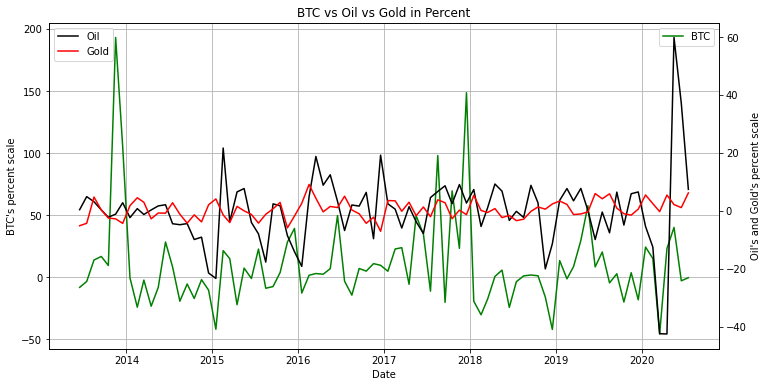

In [118]:
plt.figure(figsize=(12,6))
plt.title('BTC vs Oil vs Gold in Percent')
plt.grid()
ax1 = sns.lineplot(x='Date', y='pct_btc', data=btc_oil_gold, color='green' ,label='BTC')
ax1.set_ylabel('BTC\'s percent scale')
ax1.twinx()

ax2 = sns.lineplot(x='Date', y='pct_oil', data=btc_oil_gold, color='black',label='Oil')
ax2.set_ylabel('Oil\'s and Gold\'s percent scale')

ax3 = sns.lineplot(x='Date', y='pct_gold', data=btc_oil_gold, color='red',label='Gold')
plt.savefig('/content/drive/MyDrive/Datasets/pct_change.png')


In [117]:
summary_pct = {'btc':btc_oil_gold['Price_btc'].std() ,'gold':btc_oil_gold['Price_gold'].std() ,'oil':btc_oil_gold['Price_oil'].std()}
for k, v in summary_pct.items():
  print(k,'has standard deviation :', v)

"""BTC is the most fluctuate value """
"""Oil is the second most fluctuate value"""
"""Gold is the most stable value"""


btc has standard deviation : 3990.957078445473
gold has standard deviation : 142.38940375879855
oil has standard deviation : 23.715537630991435


'Gold is the most stable value'